In [26]:
import numpy 
import torch 
from models_Regression import mae_vit_small_patch16,vit_base_patch16,vit_large_patch16,vit_huge_patch14
import timm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = vit_large_patch16()

print(model.patch_embed.proj.in_channels)  # should print 1


1


In [3]:
model = vit_large_patch16()
print(model.patch_embed.proj.in_channels)
print(model.patch_embed.proj)
print(model.patch_embed.proj.weight.shape)


1
Conv2d(1, 1024, kernel_size=(16, 16), stride=(16, 16))
torch.Size([1024, 1, 16, 16])


In [4]:
# Load model
model = vit_large_patch16(num_classes=1)
checkpoint = torch.load('SFM-Large.pth', map_location='cpu')
model.load_state_dict(checkpoint['model'], strict=False)
model.eval()

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(1, 1024, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=1024, out_features=3072, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=1024, out_features=1024, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=1024, out_features=4096, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(


In [5]:
import numpy as np

In [15]:
# Load your noisy data (224x224 float32)
noisy_data = np.fromfile('../Denoise/seismic/0.dat', dtype=np.float32).reshape(1, 1, 224, 224)
noisy_tensor = torch.from_numpy(noisy_data)

# Denoise
with torch.no_grad():
    predicted_noise = model(noisy_tensor)
    denoised = noisy_tensor - predicted_noise  # Residual learning approach

# Save denoised result
denoised_numpy = denoised.squeeze().numpy()
denoised_numpy.tofile('denoised_output.dat')

In [16]:
noisy_data = noisy_data.reshape(224,224)

In [17]:
noisy_tensor.shape

torch.Size([1, 1, 224, 224])

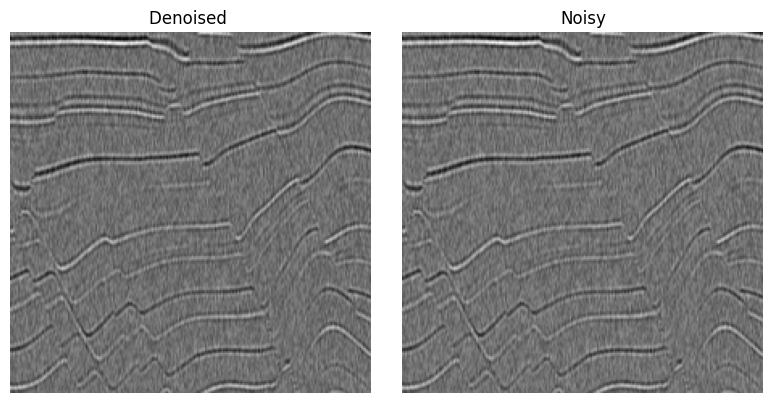

In [18]:
# Create 1 row, 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Show first array
axes[0].imshow(denoised_numpy, cmap='gray')
axes[0].set_title("Denoised ")
axes[0].axis("off")

# Show second array
axes[1].imshow(noisy_data, cmap='gray')
axes[1].set_title("Noisy")
axes[1].axis("off")

plt.tight_layout()
plt.show()



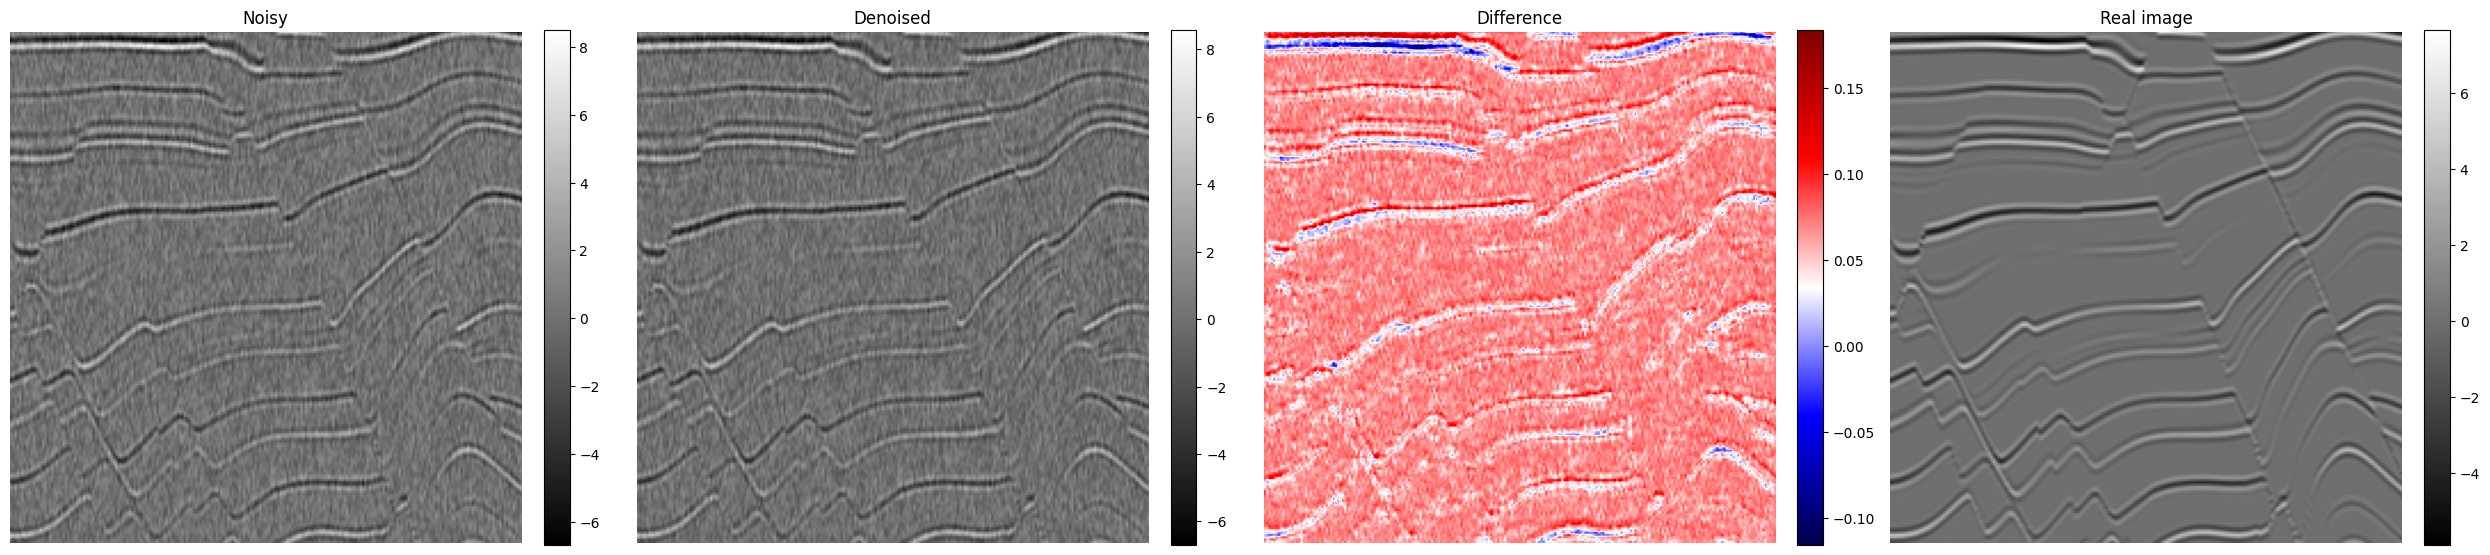

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming noisy_data and denoised_numpy are 2D arrays
noisy_img = noisy_tensor.squeeze().numpy()  # [224, 224]
denoised_img = denoised_numpy               # already [224, 224]

fig, axes = plt.subplots(1, 4, figsize=(25, 15))

im0 = axes[0].imshow(noisy_img, cmap='gray')
axes[0].set_title("Noisy")
axes[0].axis("off")
plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

im1 = axes[1].imshow(denoised_img, cmap='gray')
axes[1].set_title("Denoised")
axes[1].axis("off")
plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

diff = noisy_img - denoised_img
im2 = axes[2].imshow(diff, cmap='seismic')
axes[2].set_title("Difference")
axes[2].axis("off")
plt.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

clean_img = np.fromfile('../Denoise/label/0.dat', dtype=np.float32).reshape(224, 224)
im3 = axes[3].imshow(clean_img, cmap='gray')
axes[3].set_title("Real image")
axes[3].axis("off")
plt.colorbar(im3, ax=axes[3], fraction=0.046, pad=0.04)



# field = np.fromfile('../Denoise/field/0.dat', dtype=np.float32).reshape(224, 224)
# im4 = axes[4].imshow(field, cmap='gray')
# axes[4].set_title("Field")
# axes[4].axis("off")
# plt.colorbar(im3, ax=axes[4], fraction=0.046, pad=0.04)


plt.tight_layout()
plt.show()


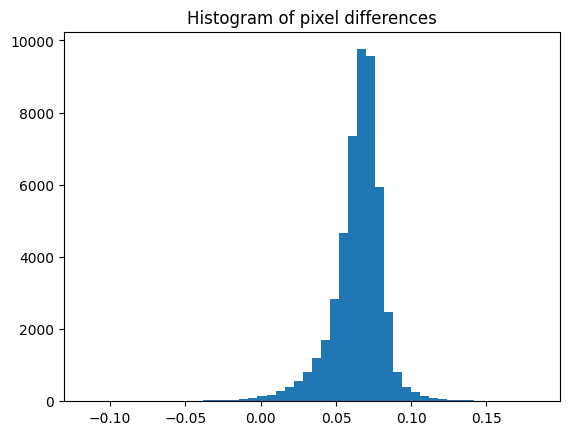

In [20]:
plt.hist((noisy_img - denoised_img).ravel(), bins=50)
plt.title("Histogram of pixel differences")
plt.show()


In [21]:
#!pip3 install scikit-image

In [22]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np

clean_img = np.fromfile('../Denoise/label/0.dat', dtype=np.float32).reshape(224, 224)
denoised_img = denoised_numpy  # already [224,224]

# Compute the range from the clean image
data_range = clean_img.max() - clean_img.min()

psnr = peak_signal_noise_ratio(clean_img, denoised_img, data_range=data_range)
ssim = structural_similarity(clean_img, denoised_img, data_range=data_range)

print(f"PSNR: {psnr:.2f}, SSIM: {ssim:.4f}")


PSNR: 26.67, SSIM: 0.4127


### Notes 

- Noise Plot
- Fine-tune model
- Multi image test 